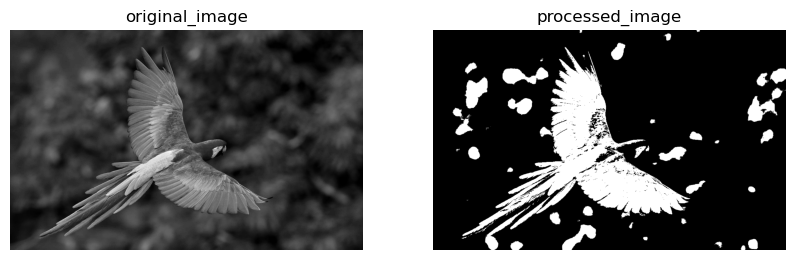

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def intensity_clamping(image_path, clamp_min=90, clamp_max=180):
    #opem the image
    with Image.open(image_path) as img:
        #convert the image to grayscale
        grayscale_image = img.convert('L')
        image_array = np.array(grayscale_image)
        
        #perform intensity clamping using nested for loops
        height,width =image_array.shape
        for i in range(height):
            for j in range(width):
                pixel = image_array[i, j]
                if pixel < clamp_min:
                    image_array[i,j] = 0
                elif pixel > clamp_min:
                    image_array[i,j]=255
                
                #if the pixel is within the range, nochanges are made
        clamped_image= Image.fromarray(image_array.astype('uint8'))
        return clamped_image, grayscale_image
    
def show_images(original_image, processed_image, processed_title="processed_image"):
    fig,axs = plt.subplots(1, 2, figsize=(10,5))
    
    axs[0].imshow(original_image, cmap='gray')
    axs[0].axis('off')
    axs[0].set_title('original_image')
    
    axs[1].imshow(processed_image, cmap='gray')
    axs[1].axis('off')
    axs[1].set_title('processed_image')
    
    plt.show()
    
image_path='./Desktop/images/1.jpg'
clamped_image, original_image = intensity_clamping(image_path, clamp_min=80, clamp_max=200)

show_images(original_image, clamped_image, processed_title='clamped image')
    


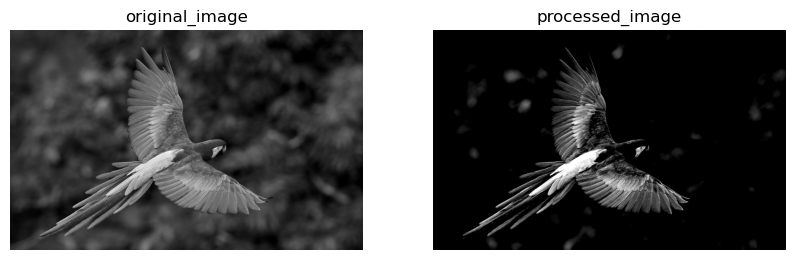

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def intensity_clamping(image_path, clamp_min=90, clamp_max=180):
    #opem the image
    with Image.open(image_path) as img:
        #convert the image to grayscale
        grayscale_image = img.convert('L')
        image_array = np.array(grayscale_image)
        
        #perform intensity clamping using nested for loops
        height,width =image_array.shape
        for i in range(height):
            for j in range(width):
                pixel = image_array[i, j]
                if pixel < clamp_min:
                    image_array[i,j] = 0
                elif clamp_min <= pixel <= clamp_max:
                    image_array[i,j] = (255* ((image_array[i, j] - clamp_min)/(clamp_max-clamp_min))).astype('uint8')
                elif pixel > clamp_max:
                    image_array[i,j]=255
                
                #if the pixel is within the range, nochanges are made
        clamped_image= Image.fromarray(image_array.astype('uint8'))
        return clamped_image, grayscale_image
    
def show_images(original_image, processed_image, processed_title="processed_image"):
    fig,axs = plt.subplots(1, 2, figsize=(10,5))
    
    axs[0].imshow(original_image, cmap='gray')
    axs[0].axis('off')
    axs[0].set_title('original_image')
    
    axs[1].imshow(processed_image, cmap='gray')
    axs[1].axis('off')
    axs[1].set_title('processed_image')
    
    plt.show()
    
image_path='./Desktop/images/1.jpg'
clamped_image, original_image = intensity_clamping(image_path, clamp_min=80, clamp_max=200)

show_images(original_image, clamped_image, processed_title='clamped image')
    


In [3]:
from PIL import Image

def calculate_brightness(image_path):
    with Image.open(image_path) as img:
        grayscale_image=img.convert('L')
        
        width,height = grayscale_image.size
        
        total_brightness = 0
        
        #nasted for loops to go through each pixel
        for i in range(width):
            for j in range(height):
                #get the pixel value atthe current position
                pixel_brightness = grayscale_image.getpixel((i,j))
                #add the pixel value to the total brightness
                total_brightness += pixel_brightness
        #calculate the average brightness
        average_brightness = total_brightness/(width * height)
        
        return average_brightness
    image_path ='./Desktop/images/1.jpg'
    brightness = calculate_brightness(image_path)
    print(f"the average brightness of the image is:{brightness}")
    

In [4]:
from PIL import Image, ImageStat

def calculate_brightness(image_path):
    with Image.open(image_path) as img:
        grayscale_image=img.convert('L')
        #cal the avarage brightness
        stat=ImageStat.Stat(grayscale_image)
        brightness = stat.mean[0]
        
        return brightness
        
image_path='./Desktop/images/1.jpg'
brightness = calculate_brightness(image_path)
print(f"The average brightness of the image is {brightness}")

The average brightness of the image is 58.06162755102041


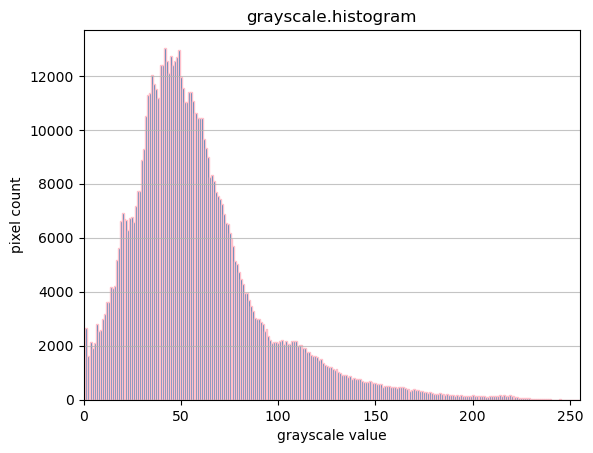

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

def compute_histrogram_with_loops(image_path):
    with Image.open(image_path) as img:
        grayscale_image = img.convert('L')
        
        width,height=grayscale_image.size
        
        #initializing a list to count the occurence of each pixelintensity
        histogram =[0]*256   #python createsa list of 256 elements,where each elements initialized to 0
        
        for i in range(width):
            for j in  range(height):
                pixel_value = grayscale_image.getpixel((i,j))
                histogram[pixel_value] += 1
        return histogram
def plot_histogram(histogram):
    plt.figure()
    plt.title('grayscale.histogram')
    plt.xlabel('grayscale value')
    plt.ylabel('pixel count')
    
    plt.bar(range(256), histogram, width=1, edgecolor='pink')
    plt.xlim(0,255)
    plt.grid(axis='y' , alpha=0.75)
    
    plt.show()
image_path='./Desktop/images/1.jpg'
histogram = compute_histrogram_with_loops(image_path)
plot_histogram(histogram)

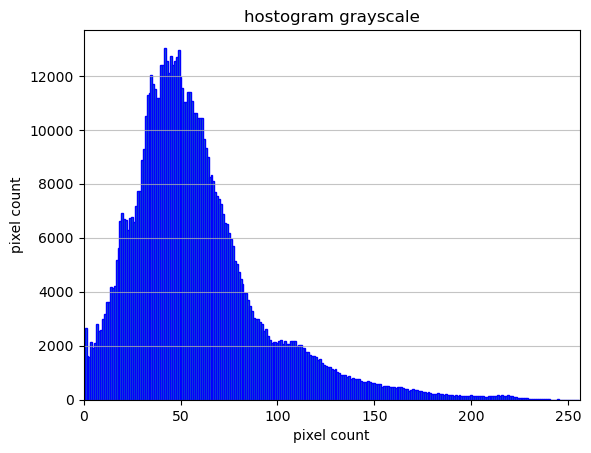

In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def compute_and_visualize_histogram(image_path):
    with Image.open(image_path) as img:
        grayscale_image = img.convert('L')
        
        #convert the grayscale image to numpy array
        pixel_values = np.array(grayscale_image).flatten()
        
        #compute the histogram
        histogram, bin_edges = np.histogram(pixel_values, bins=range(257))
        #configure and plot thehistogram
        plt.figure()
        plt.title('hostogram grayscale')
        plt.xlabel('pixel count')
        plt.ylabel('pixel count')
        
        plt.bar(bin_edges[:-1], histogram, width=1,edgecolor='blue')
        plt.xlim(min(bin_edges), max(bin_edges))
        plt.grid(axis='y', alpha=0.75)
        
        plt.show()
image_path='./Desktop/images/1.jpg'
compute_and_visualize_histogram(image_path)

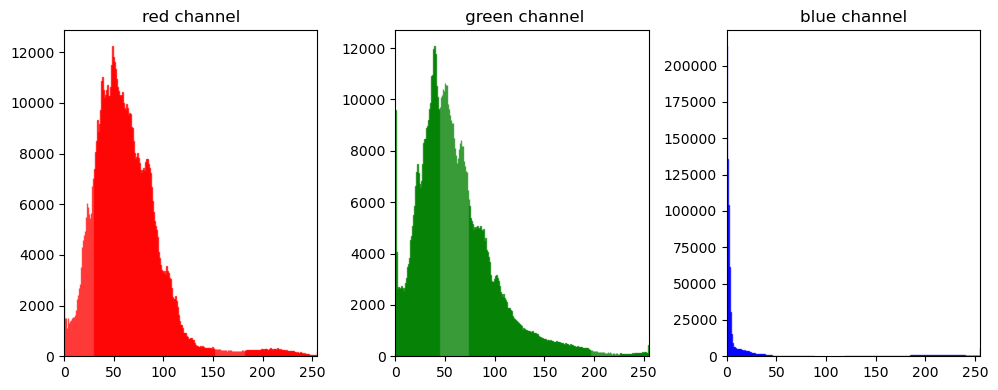

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

def compute_color_histogram(image_path):
    with Image.open(image_path) as img:
        #ensure the image in RGB mode
        rgb_image=img.convert('RGB')
        
        histogram_r = [0] * 256
        histogram_g = [0] * 256
        histogram_b = [0] * 256
        
        width,height=rgb_image.size
        for i in range(width):
            for j in  range(height):
                r, g, b = rgb_image.getpixel((i,j))
                #increment the histogram count for each color element
                
                histogram_r[r] += 1
                histogram_g[g] += 1
                histogram_b[b] += 1
        return  histogram_r, histogram_g, histogram_b
    
def plot_color_histogram(histogram_r, histogram_g, histogram_b):
    plt.figure(figsize=(10,4))
    
    #red channel
    plt.subplot(1,3,1)
    plt.bar(range(256), histogram_r, color='red', edgecolor='red', alpha=0.7)
    plt.title('red channel')
    plt.xlim([0, 255])
    
    #green channel
    plt.subplot(1,3,2)
    plt.bar(range(256), histogram_g, color='green', edgecolor='green', alpha=0.7)
    plt.title(' green channel')
    plt.xlim([0, 255])
    
    #blue channel
    plt.subplot(1,3,3)
    plt.bar(range(256), histogram_b, color='blue', edgecolor='blue', alpha=0.7)
    plt.title('blue channel')
    plt.xlim([0, 255])
    
    plt.tight_layout()
    plt.show()
image_path='./Desktop/images/1.jpg'
histogram_r, histogram_g, histogram_b=compute_color_histogram(image_path)
plot_color_histogram(histogram_r, histogram_g, histogram_b)
        

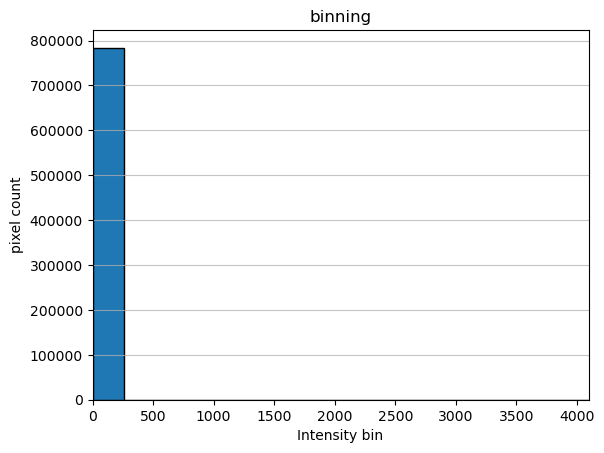

In [8]:
from PIL import Image
import matplotlib.pyplot as plt

def compute_histogram_with_binning(image_path, num_bins):
    with Image.open(image_path) as img:
        grayscale_image = img.convert('L')
        width,height=grayscale_image.size
        histogram = [0]*num_bins
        
        #calculate the bin width
        bin_width =256 
        if 256 % num_bins !=0:
            bin_width +=1
            
        for i in range(width):
            for j in  range(height):
                pixel_value = grayscale_image.getpixel((i,j))
                
                bin_index = min(pixel_value // bin_width, num_bins-1)#ensure the index within the range
                histogram[bin_index] +=1
        return histogram
    
def plot_histogram_with_binning(histogram, num_bins):
        plt.figure()
        plt.title('binning')
        plt.xlabel('Intensity bin')
        plt.ylabel('pixel count')
        
        bin_width =256        
        if 256 % num_bins !=0:
            bin_width +=1
        bin_edges = [i * bin_width for i in range(num_bins + 1)]
        
        plt.bar(bin_edges[:-1], histogram,width=bin_width, edgecolor='black', align='edge')
        
        plt.xlim(0, bin_edges[-2] + bin_width)
        
        plt.grid(axis='y',alpha=0.75)
        
        plt.show()
image_path='./Desktop/images/1.jpg'
num_bins=16
histogram =compute_histogram_with_binning(image_path, num_bins)
plot_histogram_with_binning(histogram, num_bins)

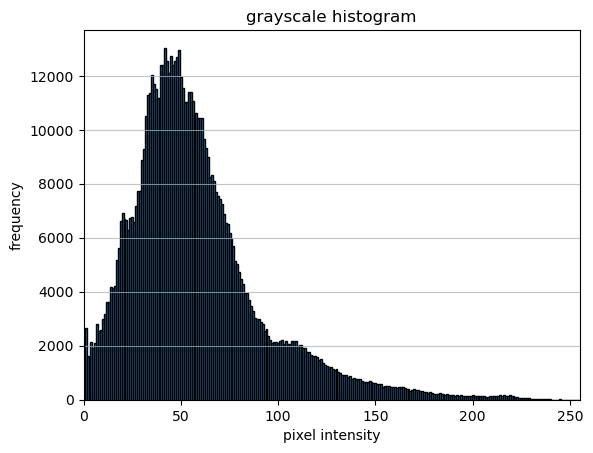

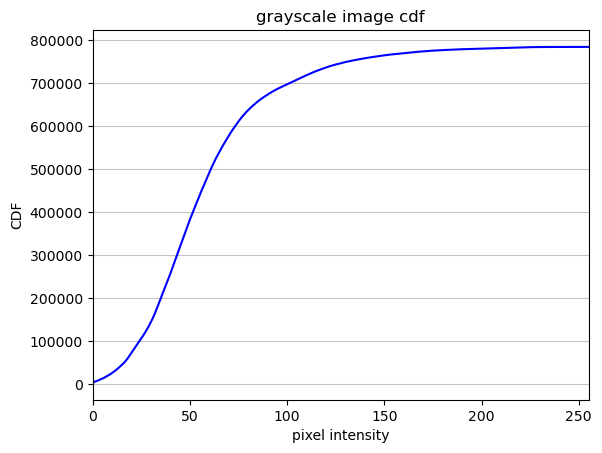

In [9]:
from PIL import Image
import matplotlib.pyplot as plt

def compute_histogram_and_cdf(image_path):
    with Image.open(image_path) as img:
        grayscale_image = img.convert('L')
        width,height=grayscale_image.size
        histogram = [0]*256
        
            
        for i in range(width):
            for j in  range(height):
                pixel_value = grayscale_image.getpixel((i,j))
                #increment the histogram count for the pixelvalue
                histogram[pixel_value] +=1
                
        cdf = [sum(histogram[:i+1]) for i in range(len(histogram))]
        return histogram,cdf
def plot_histogram(histogram):
        plt.figure()
        plt.title('grayscale histogram')
        plt.xlabel('pixel intensity')
        plt.ylabel('frequency')
        plt.bar(range(len(histogram)), histogram, width=1, edgecolor='black')
        plt.xlim(0, 255)
        plt.grid(axis='y', alpha=0.75)
        plt.show()
        
def plot_cdf(cdf):
        plt.figure()
        plt.title('grayscale image cdf')
        plt.xlabel('pixel intensity')
        plt.ylabel('CDF')
        plt.plot(range(len(cdf)), cdf, color='blue')
        plt.xlim(0, 255)
        plt.grid(axis='y', alpha=0.75)
        plt.show()
image_path='./Desktop/images/1.jpg'
histogram,cdf=compute_histogram_and_cdf(image_path)
plot_histogram(histogram)
plot_cdf(cdf)

In [10]:
from PIL import Image
import matplotlib.pyplot as plt

def compute_histogram(image):
        width,height=image.size
        histogram = [0]*256          
        for x in range(width):
            for y in  range(height):
                pixel_value = image.getpixel((x,y))
                #increment the histogram count for the pixelvalue
                histogram[pixel_value] +=1
                
        return histogram
def compute_cdf(histogram):
    cdf =[0] * len(histogram)
    cum_sum =0
    for i ,val in enumerate(histogram):
        cum_sum +=val
        cdf[i] = cum_sum
    return cdf
def histogram_equalization(image):
    histogram = compute_histogram(image)
    cdf = compute_cdf(histogram)
    cdfmin = min([x for x in cdf if x > 0]) 
    cdf_normalized = [(x - cdf_min)/ (cdf[-1] - cdf_min) for x in cdf]
    
    #create the equalization map
    
    equalization_map = [int(x*255) for x in cdf_normalized]
    
    #apply the equalization mapping to the pixels
    width,height=image.size
    equlaized_image = Image.new('L', (width,height))
    
    for x in range(width):
        for y in  range(height):
                pixel_value = image.getpixel((x,y))
                equalized_image.putpixel((x,y), equalization_map[pixel_value])
                
    return equlaized_image,histogram,compute_histogram(equalized_image)


def plot_images_cdfs_histograms(original_image, equalized_image, original_histogram, equalized_histogram):
    fig,axs = plt.subplots(3, 2,figsize=(12,9))
    
    axs[0, 0].imshow(original_image, cmap='gray')
    axs[0, 0].set_title('original image')
    axs[0, 0].axis('off')
    
    axs[0, 1].imshow(equalized_image, cmap='gray')
    axs[0, 1].set_title('equlaized image')
    axs[0, 1].axis('off')
    
    #plot oroginal CDF
    original_cdf = compute_cdf(original_histogram)
    axs[1, 0].plot(original_cdf, color='blue')
    axs[1, 0].set_title('original CDF')
    axs[1, 0].set_xlim([0, 255])
    
    equalized_cdf = compute_cdf(equalized_histogram)
    axs[1, 1].plot(equalized_cdf, color='blue')
    axs[1, 1].set_title('equalized CDF')
    axs[1, 1].set_xlim([0, 255])
    
    axs[2, 0].bar(range(len(original_histogram)), original_histogram, width=1, edgecolor='black')
    axs[2, 0].set_title('original histogram')
    axs[2, 0].set_xlim([0, 255])
    
    axs[2, 1].bar(range(len(equalized_histogram)), equalized_histogram, width=1, edgecolor='black')
    axs[2, 1].set_title('equalized histogram')
    axs[2, 1].set_xlim([0, 255])
    
    plt.tight_layout()
    plt.show()

image_path='./Desktop/images/1.jpg'
original_image= Image.open(image_path).convert('L')

equalized_image, original_histogram,equalized_histogram = histogram_equalization(original_image)

plot_images_cdfs_histograms(original_image,equalized_image, original_histogram,equalized_histogram )
    

NameError: name 'cdf_min' is not defined